Working on  camera_cal\calibration10.jpg
Working on  camera_cal\calibration11.jpg
Working on  camera_cal\calibration12.jpg
Working on  camera_cal\calibration13.jpg
Working on  camera_cal\calibration14.jpg
Working on  camera_cal\calibration15.jpg
Working on  camera_cal\calibration16.jpg
Working on  camera_cal\calibration17.jpg
Working on  camera_cal\calibration18.jpg
Working on  camera_cal\calibration19.jpg
Working on  camera_cal\calibration2.jpg
Working on  camera_cal\calibration20.jpg
Working on  camera_cal\calibration3.jpg
Working on  camera_cal\calibration6.jpg
Working on  camera_cal\calibration7.jpg
Working on  camera_cal\calibration8.jpg
Working on  camera_cal\calibration9.jpg


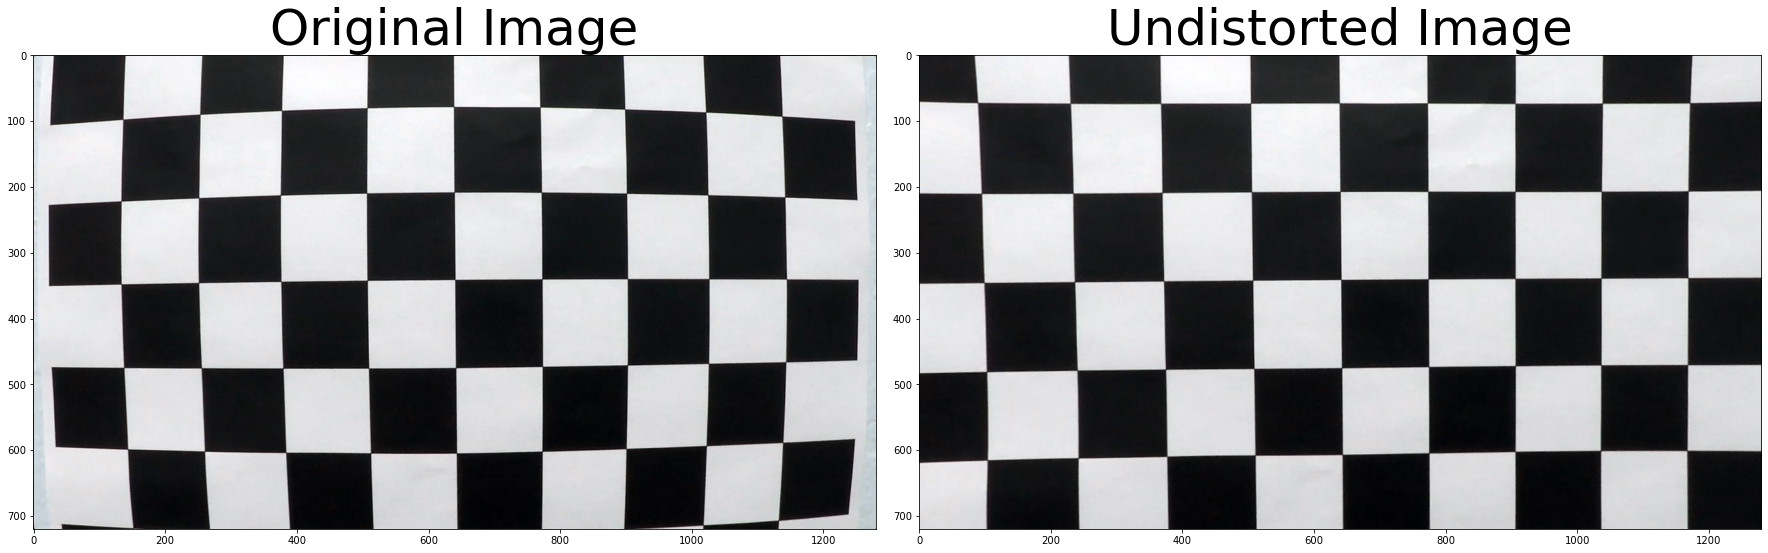

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import glob
%matplotlib inline

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# prepare object points
nx = 9#TODO: enter the number of inside corners in x
ny = 6#TODO: enter the number of inside corners in y

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx,fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)

    # If found, add object points, image points
    if ret == True:
        print('Working on ', fname)
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)      
        cv2.imwrite('camera_cal/corners_found_'+str(idx)+'.jpg', img)
        
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

img = cv2.imread('camera_cal/calibration1.jpg')
dst = cv2.undistort(img, mtx, dist, None, mtx)
#plt.imshow(dst)
#print(gray.shape[::-1])
#print(gray.shape)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

dist_pickle = {}
dist_pickle['mtx'] = mtx
dist_pickle['dist'] = dist
pickle.dump(dist_pickle, open('camera_cal/calibration_pickle.p', 'wb'))




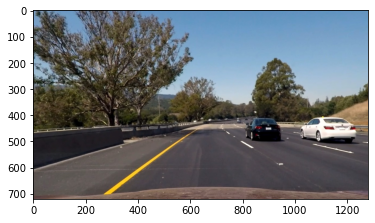

In [6]:
# generate bird view image
images = glob.glob('test_images/test*.jpg')

for idx,fname in enumerate(images):
    img = cv2.imread(fname)
    img = cv2.undistort(img,mtx,dist,None,mtx)     
    r,g,b = cv2.split(img)
    result = cv2.merge((b,g,r))
    write_name = 'test_images/undistorted' + str(idx) + '.jpg'
    cv2.imwrite(write_name, img)
    plt.imshow(result, cmap='gray') 